In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [12]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [13]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#for row in session.query(Measurement.date).all():
#    print(row)
    
# Calculate the date 1 year ago from the last data point in the database
#last data point 2017-08-23
#tobs time of observation changes
sel = [Measurement.station, 
       Measurement.date, 
       Measurement.prcp, 
       Measurement.tobs]

year_data = session.query(*sel).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= "2016-09-01").\
    order_by(Measurement.date).all()
year_data

[('USC00519397', '2016-09-01', 0.0, 81.0),
 ('USC00513117', '2016-09-01', 0.0, 79.0),
 ('USC00514830', '2016-09-01', 0.0, 82.0),
 ('USC00517948', '2016-09-01', None, 82.0),
 ('USC00519281', '2016-09-01', 0.02, 80.0),
 ('USC00516128', '2016-09-01', 0.01, 77.0),
 ('USC00519397', '2016-09-02', 0.0, 80.0),
 ('USC00513117', '2016-09-02', 0.02, 78.0),
 ('USC00514830', '2016-09-02', 0.19, 81.0),
 ('USC00517948', '2016-09-02', None, 81.0),
 ('USC00519523', '2016-09-02', None, 81.0),
 ('USC00519281', '2016-09-02', 0.01, 80.0),
 ('USC00516128', '2016-09-02', 0.03, 75.0),
 ('USC00519397', '2016-09-03', 0.0, 79.0),
 ('USC00513117', '2016-09-03', 0.07, 77.0),
 ('USC00519523', '2016-09-03', 0.08, 78.0),
 ('USC00519281', '2016-09-03', 0.12, 78.0),
 ('USC00516128', '2016-09-03', 1.0, 75.0),
 ('USC00519397', '2016-09-04', 0.03, 75.0),
 ('USC00513117', '2016-09-04', 0.03, 75.0),
 ('USC00519523', '2016-09-04', 0.74, 84.0),
 ('USC00519281', '2016-09-04', 0.14, 78.0),
 ('USC00516128', '2016-09-04', 0.44, 7

In [83]:
# Perform a query to retrieve the data and precipitation scores
year_station_list = []
year_date_list = []
year_prcp_list = []
year_tobs_list = []

for row in year_data:
    year_station_list.append(row.station)
    year_date_list.append(row.date)
    year_prcp_list.append(row.prcp)
    year_tobs_list.append(row.tobs)
# Save the query results as a Pandas DataFrame and set the index to the date column       
d = {"Station":year_station_list,
    "Date":year_date_list,
    "Percipitation":year_prcp_list,
    "tobs":year_tobs_list}

year_df = pd.DataFrame(d)


year_df['Percipitation'] = year_df['Percipitation'].fillna(0)
year_df['tobs'] = year_df['tobs'].fillna(0)
# Sort the dataframe by date
year_df

,Station,Date,Percipitation,tobs
0,USC00519397,2016-09-01,0.00,81.0
1,USC00513117,2016-09-01,0.00,79.0
2,USC00514830,2016-09-01,0.00,82.0
3,USC00517948,2016-09-01,0.00,82.0
4,USC00519281,2016-09-01,0.02,80.0
...,...,...,...,...
2166,USC00516128,2017-08-22,0.50,76.0
2167,USC00519397,2017-08-23,0.00,81.0
2168,USC00514830,2017-08-23,0.00,82.0
2169,USC00519523,2017-08-23,0.08,82.0


In [84]:
year_df.index = pd.DatetimeIndex(year_df.Date)

year_monthly_df = year_df.resample('M').mean()

year_monthly_df

,Percipitation,tobs
Date,,
2016-09-30,0.260000,77.747368
2016-10-31,0.109949,77.196970
2016-11-30,0.110538,74.543011
2016-12-31,0.177550,71.130000
2017-01-31,0.062565,69.691099
2017-02-28,0.220678,69.892655
2017-03-31,0.156720,72.370370
2017-04-30,0.289000,73.652632
2017-05-31,0.145230,75.155172


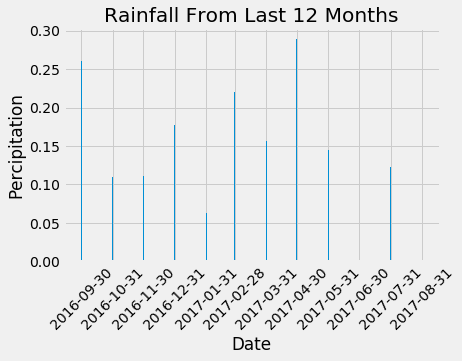

In [85]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(year_monthly_df.index, year_monthly_df['Percipitation'])
plt.xlabel('Date')
plt.xticks(year_monthly_df.index)
plt.xticks(rotation=45)
plt.ylabel('Percipitation')
plt.title('Rainfall From Last 12 Months')
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
